In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import CBGTC
import CBGTC_3b
import basalganglia
import thalamusFC

rcParams.update({'font.size': 20, 'font.family': 'DejaVu Sans', 'mathtext.fontset': 'stix'})
rcParams['axes.labelpad'] = 25
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['lines.linewidth'] = 3

In [2]:
# Define saliences 

salience_range = 10 

saliences1 = np.arange(0.2, 1.1, 1/salience_range)

selection_matrix = np.zeros((salience_range, salience_range))


# Simulate network for each salience pair, extract how many channels are selected each time

salience_pairs = np.empty((salience_range, salience_range), dtype=object)

for i, s1 in enumerate(saliences1):
    for j, s2 in enumerate(np.flip(saliences1)):
        salience_pairs[j, i] = "%.2f, %.2f" % (s1, s2)
        
        saliences = np.array([s1, s2, 0, 0, 0])  # add zeros to reach the number of channels as you intend to use 
        
        selection_matrix[j, i] = CBGTC_3b.main(saliences) # run network with this salience input, store number of channels selected



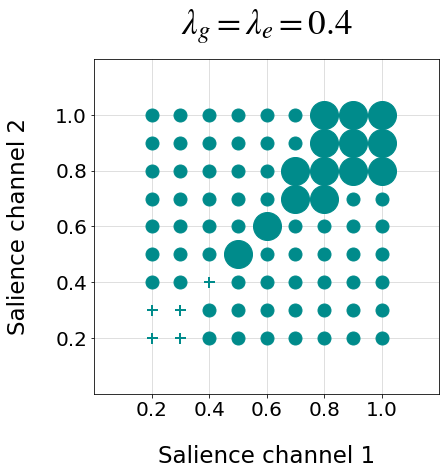

In [3]:
# Plot figure

fig, ax = plt.subplots(figsize=(6.6, 7))

for i, s1 in enumerate(saliences1):
    for j, s2 in enumerate(np.flip(saliences1)):
        if selection_matrix[j, i] == 0:
            ax.plot(s1, s2, marker='+', c='darkcyan', markersize='11', mew=2.0)
        elif selection_matrix[j, i] == 1:
            ax.plot(s1, s2, marker='o', c='darkcyan', markersize='13')
        else:
            ax.plot(s1, s2, marker='o', c='darkcyan', markersize='28')
            
ax.set_xlabel(r'Salience channel 1', fontsize=23)
ax.set_ylabel(r'Salience channel 2', fontsize=23)
ax.set_title(r'$\lambda_g = \lambda_e = 0.4$', fontsize=35, pad=25)  # change lambda

ax.grid(b=True, which='major', alpha=0.5)
ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim([0, 1.2])
ax.set_xlim([0, 1.2])

fig.tight_layout()